## PartI
**编程实现对率回归，并给出西瓜数据集3.0$\alpha$上的结果。**

In [1]:
import numpy as np 


# 输入西瓜数据集
watermelon= np.array([[0.697,0.460,'是'],[0.774,0.376,'是'],[0.634,0.264,'是'],
           [0.608,0.318,'是'],[0.556,0.215,'是'],[0.403,0.237,'是'],
           [0.481,0.149,'是'],[0.437,0.211,'是'],[0.666,0.091,'否'],
           [0.243,0.267,'否'],[0.245,0.057,'否'],[0.343,0.099,'否'],
           [0.639,0.161,'否'],[0.657,0.198,'否'],[0.360,0.370,'否'],
           [0.593,0.042,'否'],[0.719,0.103,'否']])

In [2]:
## 提取特征和类别
features_raw = watermelon[:,0:2].astype('float')
labels_raw = watermelon[:,-1][:,None]

# 数据预处理
x0 = np.ones((len(watermelon),1))
features = np.column_stack((x0,features_raw))

labels=list()
for i in range(len(labels_raw)):
    if labels_raw[i]=='是':
        labels.append(1)
    else:
        labels.append(0)
        
## 拆分训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.5, random_state=0)

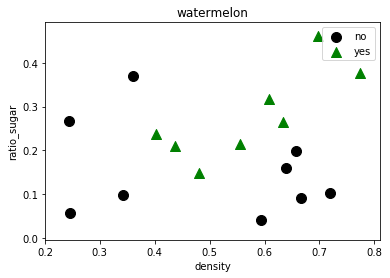

In [3]:
# 画图看一下数据集情况
import matplotlib.pyplot as plt

idx_0=[]
idx_1=[]
for idx, label in enumerate(labels):
    if label == 1:
        idx_1.append(idx)
    else:
        idx_0.append(idx)


f1 = plt.figure(1)
plt.title('watermelon')
plt.xlabel('density')
plt.ylabel('ratio_sugar')
plt.scatter(features_raw[idx_0,0],features_raw[idx_0,1],marker='o',color='k',s=100,label='no')
plt.scatter(features_raw[idx_1,0],features_raw[idx_1,1],marker='^',color='g',s=100,label='yes')
plt.legend(loc='upper right')
plt.show()

#### 使用梯度下降法实现对率回归

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def gradient_descent(train_feature,train_label,alpha,max_iterations):
    m, n = train_feature.shape
    label = np.mat(train_label).reshape(m,1)
    
    weights = np.ones((n,1))
    for i in range(max_iterations):
        error = label - sigmoid(np.dot(train_feature,weights))
        weights = weights - alpha*(-np.dot(train_feature.T,error))
    return weights

def test_pred(test_feature, weights):
    pred = np.dot(test_feature, weights)
    pred_label = list()
    for i in range(len(pred)):
        if pred[i]>= 0.5:
            pred_label.append(1)
        else:
            pred_label.append(0)
    return pred_label

def test_score(pred_label,test_label):
    count = 0
    for i in range(len(pred_label)):
        if pred_label[i] == test_label[i]:
            count += 1
    accuracy_score = count/len(pred_label)
    return accuracy_score

In [5]:
weights=gradient_descent(X_train,y_train,alpha=10,max_iterations=1000)
pred_label=test_pred(X_test,weights)
accuracy_score=test_score(pred_label, y_test)
print(accuracy_score)

0.6666666666666666


#### 使用随机梯度下降法实现对率回归

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def random_descent(train_feature, train_label,max_iterations,alpha):
    m,n = train_feature.shape
    label = train_label
    
    weights = np.ones(n)
    for i in range(max_iterations):
        for j in range(m):
            error = label[j] - sigmoid(np.dot(train_feature[j],weights))
            weights = weights +alpha*error*train_feature[j]
    return weights
def test_pred2(test_feature, weights):
    pred = np.dot(test_feature, weights)
    pred_label = list()
    for i in range(len(pred)):
        if pred[i]>= 0.5:
            pred_label.append(1)
        else:
            pred_label.append(0)
    return pred_label

def test_score2(pred_label,test_label):
    count = 0
    for i in range(len(pred_label)):
        if pred_label[i] == test_label[i]:
            count += 1
    accuracy_score = count/len(pred_label)
    return accuracy_score

In [7]:
weights2=random_descent(X_train,y_train,alpha=5,max_iterations=1000)
pred_label2=test_pred2(X_test,weights2)
accuracy_score2=test_score2(pred_label2, y_test)
print(accuracy_score2)

0.6666666666666666


#### 使用牛顿法实现对率回归

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def newton_method(train_feature, train_label, max_iterations):
    m, n = train_feature.shape
    label = np.mat(train_label).reshape(m,1)
    
    weights = np.ones((n,1))
    for i in range(max_iterations):
        error = label - sigmoid(np.dot(train_feature, weights))
        deriv1 = -np.dot(train_feature.T,error)
        v = np.dot(error,(1-error).T)
        deriv2 = train_feature.T*v*train_feature
        weights = weights - deriv2*deriv1
    return weights
def test_pred1(test_feature, weights):
    pred= np.dot(test_feature,weights)
    pred_label = list()
    for i in range(len(pred)):
        if pred[i] >= 0.5:
            pred_label.append(1)
        else:
            pred_label.append(0)
    return pred_label
def test_score1(pred_label, test_label):
    count = 0
    for i in range(len(pred_label)):
        if pred_label[i]==test_label[i]:
            count +=1
    accuracy_score = count/(len(pred_label))
    return accuracy_score

In [9]:
weights1=newton_method(X_train,y_train,max_iterations=500)
pred_label1=test_pred1(X_test,weights1)
accuracy_score1=test_score1(pred_label1, y_test)
print(accuracy_score1)

0.4444444444444444


#### 采用sklearn逻辑斯蒂库函数直接拟合

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

log = LogisticRegression()
log.fit(X_train,y_train)
pred_label = log.predict(X_test)
score=accuracy_score(y_test,pred_label)

print(confusion_matrix(y_test,pred_label))
print(score)

[[3 2]
 [1 3]]
0.666666666667


## Part II
**选择两个UCI数据集，比较十折交叉验证法和留一法所估计出的对率回归的错误率。**
### 1.选择Iris数据集  
内部共150个数据集，3种类别，每类50个样本。  
每次选择两类做二分类计算，做3轮计算。  
每轮选择100个样本，10折交叉验证每次选45正-45反，剩余10个作为验证，一共10组，共验证100例。  
留一法每次留一个作为验证集，一共做100组，也就是100例。  
每个方法最终验证300例，直接比较错误分类的个数就能评价两种方法在数据集上的适用程度。

In [173]:
from random import sample

# 读取数据 
# 提取特征和类别
features_raw = []
labels = []
with open('iris.txt') as f:
    for line in f.readlines():
        lines = line.strip().split(',')
        features_raw.append(lines[0:4])
        labels.append(lines[-1])
        
# 数据预处理
features = np.array(features_raw).astype('float')
label_name = np.unique(labels)

## 随机抽样，获得50个正例与50个反例的集合
def data_preprocess(features_raw,labels_raw, labels_name):
    # 将类别处理为0-1变量
    label_pre = []
    for i in range(len(labels_raw)):
        if labels_raw[i] == labels_name:
            label_pre.append(1)
        else:
            label_pre.append(0)
    labels_pre = np.array(label_pre)
    # 抽取等量的正类和负类使得样本平衡
    id_0=[]
    id_1 = []
    for idl, label in enumerate(labels_pre):
        if label == 1:
            id_1.append(idl)
        else:
            id_0.append(idl)
    new_id = id_1+sample(id_0, len(id_1))
    features_new = features_raw[new_id]
    labels_new = labels_pre[new_id]
    return features_new, labels_new 


# 二分类类别：正类为'Iris-setosa'，其余是负类
features1, y1_labels = data_preprocess(features, labels, label_name[0])

# 二分类类别：正类为'Iris-versicolor'，其余是负类
features2, y2_labels = data_preprocess(features, labels, label_name[1])

# 二分类类别：正类为'Iris-virginica'，其余是负类
features3, y3_labels = data_preprocess(features, labels, label_name[2])

#### 用sklearn 实现交叉验证

In [174]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def cross_valid(feature_all, label_all, n_splits):
    kf=StratifiedKFold(n_splits)
    score_all=[]
    for train_index, test_index in kf.split(feature_all,label_all):
        X_train, X_test = feature_all[train_index],feature_all[test_index]
        y_train, y_test = label_all[train_index],label_all[test_index]
        log1=LogisticRegression()
        log1.fit(X_train, y_train)
        pred_test = log1.predict(X_test)
        score = accuracy_score(y_test, pred_test)
        score_all.append(score)
    return score_all
print('the result of ten-fold crossvalidation :') 
print('accuracy score of Iris-setosa is',np.mean(cross_valid(features1,y1_labels,n_splits=10)))
print('accuracy score of Iris-versicolor is',np.mean(cross_valid(features2,y2_labels,n_splits=10)))
print('accuracy score of Iris-virginica is',np.mean(cross_valid(features3,y3_labels,n_splits=10)))

the result of ten-fold crossvalidation :
accuracy score of Iris-setosa is 1.0
accuracy score of Iris-versicolor is 0.72
accuracy score of Iris-virginica is 0.96


#### 用sklearn 实现留一法

In [175]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def leave_one_out(feature_all, label_all):
    loo = LeaveOneOut()
    score_all=[]
    for train_index, test_index in loo.split(feature_all,label_all):
        X_train, X_test = feature_all[train_index],feature_all[test_index]
        y_train, y_test = label_all[train_index],label_all[test_index]
        log1=LogisticRegression()
        log1.fit(X_train, y_train)
        pred_test = log1.predict(X_test)
        score = accuracy_score(y_test, pred_test)
        score_all.append(score)
    return score_all


print('the result of leave-one-out :') 
print('accuracy score of Iris-setosa is',np.mean(leave_one_out(features1,y1_labels)))
print('accuracy score of Iris-versicolor is',np.mean(leave_one_out(features2,y2_labels)))
print('accuracy score of Iris-virginica is',np.mean(leave_one_out(features3,y3_labels)))

the result of leave-one-out :
accuracy score of Iris-setosa is 1.0
accuracy score of Iris-versicolor is 0.72
accuracy score of Iris-virginica is 0.96


#### 用之前的函数手动实现
- 梯度下降法 实现交叉验证

In [176]:
from sklearn.model_selection import StratifiedKFold

def cross_valid1(feature_all, label_all, n_splits):
    kf=StratifiedKFold(n_splits)
    score_all=[]
    for train_index, test_index in kf.split(feature_all,label_all):
        X_train, X_test = feature_all[train_index],feature_all[test_index]
        y_train, y_test = label_all[train_index],label_all[test_index]
        weights=gradient_descent(X_train,y_train,alpha=10,max_iterations=1000)
        pred_label=test_pred(X_test,weights)
        score_all.append(test_score(pred_label, y_test))
    return score_all
print('the result of ten-fold crossvalidation :') 
print('accuracy score of Iris-setosa is',np.mean(cross_valid1(features1,y1_labels,n_splits=10)))
print('accuracy score of Iris-versicolor is',np.mean(cross_valid1(features2,y2_labels,n_splits=10)))
print('accuracy score of Iris-virginica is',np.mean(cross_valid1(features3,y3_labels,n_splits=10)))

the result of ten-fold crossvalidation :


/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


accuracy score of Iris-setosa is 1.0
accuracy score of Iris-versicolor is 0.6
accuracy score of Iris-virginica is 0.95


- 用梯度下降实现留一法

In [177]:
from sklearn.model_selection import LeaveOneOut

def leave_one_out1(feature_all, label_all):
    loo = LeaveOneOut()
    score_all=[]
    for train_index, test_index in loo.split(feature_all,label_all):
        X_train, X_test = feature_all[train_index],feature_all[test_index]
        y_train, y_test = label_all[train_index],label_all[test_index]
        weights=gradient_descent(X_train,y_train,alpha=10,max_iterations=1000)
        pred_label=test_pred(X_test,weights)
        score_all.append(test_score(pred_label, y_test))
    return score_all


print('the result of leave-one-out :') 
print('accuracy score of Iris-setosa is',np.mean(leave_one_out1(features1,y1_labels)))
print('accuracy score of Iris-versicolor is',np.mean(leave_one_out1(features2,y2_labels)))
print('accuracy score of Iris-virginica is',np.mean(leave_one_out1(features3,y3_labels)))

the result of leave-one-out :


/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


accuracy score of Iris-setosa is 1.0
accuracy score of Iris-versicolor is 0.57
accuracy score of Iris-virginica is 0.98


## 2.选择wine数据集
- 这里我们只使用sklearn进行实现，其余实现方法与Iris相同。

In [178]:
from random import sample

# 读取数据 
# 提取特征和类别
wine_features_raw = []
wine_labels = []
with open('wine.txt') as f:
    for line in f.readlines():
        lines = line.strip().split(',')
        wine_features_raw.append(lines[1:])
        wine_labels.append(lines[0])  
# 数据预处理        
wine_features = np.array(wine_features_raw).astype('float')
wine_label_name = np.unique(wine_labels)  

# 二分类类别：正类为'Iris-setosa'，其余是负类
wine_features1, wine_y1_labels = data_preprocess(wine_features, wine_labels, wine_label_name[0])

# 二分类类别：正类为'Iris-versicolor'，其余是负类
wine_features2, wine_y2_labels = data_preprocess(wine_features, wine_labels, wine_label_name[1])

# 二分类类别：正类为'Iris-virginica'，其余是负类
wine_features3, wine_y3_labels = data_preprocess(wine_features, wine_labels, wine_label_name[2])

#### 交叉验证

In [184]:
print('the result of ten-fold crossvalidation :') 

print('accuracy score of Iris-setosa is',np.mean(cross_valid(wine_features1,wine_y1_labels,n_splits=10)))
print('accuracy score of Iris-versicolor is',np.mean(cross_valid(wine_features2,wine_y2_labels,n_splits=10)))
print('accuracy score of Iris-virginica is',np.mean(cross_valid(wine_features3,wine_y3_labels,n_splits=10)))

the result of ten-fold crossvalidation :
accuracy score of Iris-setosa is 0.958333333333
accuracy score of Iris-versicolor is 0.944642857143
accuracy score of Iris-virginica is 0.98


#### 留一法

In [185]:
print('the result of leave-one-out :') 
print('accuracy score of Iris-setosa is',np.mean(leave_one_out(wine_features1,wine_y1_labels)))
print('accuracy score of Iris-versicolor is',np.mean(leave_one_out(wine_features2,wine_y2_labels)))
print('accuracy score of Iris-virginica is',np.mean(leave_one_out(wine_features3,wine_y3_labels)))

the result of leave-one-out :
accuracy score of Iris-setosa is 0.957627118644
accuracy score of Iris-versicolor is 0.950704225352
accuracy score of Iris-virginica is 0.96875


**结果**  
由结果可见，十折交叉验证法和留一法结果基本一致。